In [1]:
# I made an adaptation of the data contained in this Github repository:
    # https://github.com/dancor7/Udacity-Write-a-Data-Science-Blog-Post/blob/master/Code.ipynb

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

%matplotlib inline
pd.set_option('display.max_columns', None)

df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

# Data Evaluation

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [3]:
num_rows = df.shape[0]
num_cols = df.shape[1]

print(num_cols,"colunms", "and", num_rows,"rows")

154 colunms and 51392 rows


In [4]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


# Assesment:

- Prepare data:
    - Gather necessary data to andswer your questions.
    - Handle categorical and missin data.
    - Provide insight into the methods you chose and why you chose them.
    

 - Analyze, Model and Visualize:
     - Provide a clear connection between your business questions 

## Clean Data

Select columns of interest ad filter the data unwanted respondants

In [5]:
# Select variables of interest, since they are the ones we want to asses.
columns = ['Respondent', 'Country', 'YearsCodedJob', 'FormalEducation', 'CareerSatisfaction', 'Salary']

# Apply filters.
data = df[df['Professional']=='Professional developer']
data = data[data['EmploymentStatus']=='Employed full-time']

# Filter columns of interest.
data = data[columns]

# Test
data.head()

,Respondent,Country,YearsCodedJob,FormalEducation,CareerSatisfaction,Salary
2,3,United Kingdom,20 or more years,Bachelor's degree,8.0,113750.0
4,5,Switzerland,10 to 11 years,Master's degree,6.0,NaN
7,8,Poland,7 to 8 years,Master's degree,7.0,NaN
8,9,Colombia,7 to 8 years,Bachelor's degree,6.0,NaN
11,12,Canada,8 to 9 years,Bachelor's degree,8.0,NaN


Create the Location variable which will indicate if the data point comes frome Mexico, Central America, Caribbean or Sourt America. 

In [6]:
Mexico = ['Mexico']

Central_America = ['Guatemala', 'El Salvador', 'Nicaragua', 'Costa Rica', 'Panama', 'Honduras']

South_America = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela']

# Add a new category separating to Central and South
data['Location'] = data['Country'].apply(lambda x: 'Central_America' if x in Central_America
                                         else ('South_America' if x in South_America 
                                         else ('Mexico' if x in Mexico else 'Other')))
# Test
data.head()

,Respondent,Country,YearsCodedJob,FormalEducation,CareerSatisfaction,Salary,Location
2,3,United Kingdom,20 or more years,Bachelor's degree,8.0,113750.0,Other
4,5,Switzerland,10 to 11 years,Master's degree,6.0,NaN,Other
7,8,Poland,7 to 8 years,Master's degree,7.0,NaN,Other
8,9,Colombia,7 to 8 years,Bachelor's degree,6.0,NaN,South_America
11,12,Canada,8 to 9 years,Bachelor's degree,8.0,NaN,Other


Once the Location variable is created, we area ready to be able to filter any response outside the countries of interest.

In [7]:
data = data[data['Location'].isin(["Mexico", "Central_America", "South_America"])]

data.Location.unique()

array(['South_America', 'Mexico', 'Central_America'], dtype=object)

Since we will use the number of years in a job, we shall map a value that will be easier to read and also easier a plot.

In [8]:
years = {'Less than a year' : 0,
         '1 to 2 years' : 1,
         '2 to 3 years' : 2,
         '3 to 4 years' : 3,
         '4 to 5 years' : 4,
         '5 to 6 years' : 5,
         '6 to 7 years' : 6,
         '7 to 8 years' : 7,
         '8 to 9 years' : 8,
         '9 to 10 years' : 9,
         '10 to 11 years' : 10,
         '11 to 12 years' : 11,
         '12 to 13 years' : 12,
         '13 to 14 years' : 13,
         '14 to 15 years' : 14,
         '15 to 16 years' : 15,
         '16 to 17 years' : 16,
         '17 to 18 years' : 17,
         '18 to 19 years' : 18,
         '19 to 20 years' : 19,
         '20 or more years' : 20,
         np.nan : -1}

data = data.reset_index()
data['YearsCodedJob'] = data['YearsCodedJob'].apply(lambda x: years[x])
data['YearsCodedJob'] = pd.to_numeric(data['YearsCodedJob'])

# Erase he point with -1 since they were placeholder for -1
data = data[data['YearsCodedJob'] != -1]

# Test
data.YearsCodedJob.unique()

array([ 7,  0,  6,  9,  1,  4, 11, 12,  5,  2, 10,  8, 14,  3, 18, 16, 15,
       13, 20, 17, 19], dtype=int64)

For missing values, since we are working 2 target variables, salary an career satisfaction, we shall create  different datasets, one for each, and eliminate those cases that do not have target variable, as we do not want to create sinthetic data will stain the study.

In [9]:
salary = data[data['Salary'].notnull()]
salary.drop('CareerSatisfaction', axis=1, inplace=True)

CareerSatisfaction = data[data['CareerSatisfaction'].notnull()]
CareerSatisfaction.drop('Salary', axis=1, inplace=True)

Test

In [10]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 3 to 1195
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            466 non-null    int64  
 1   Respondent       466 non-null    int64  
 2   Country          466 non-null    object 
 3   YearsCodedJob    466 non-null    int64  
 4   FormalEducation  466 non-null    object 
 5   Salary           466 non-null    float64
 6   Location         466 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 29.1+ KB


In [11]:
CareerSatisfaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1189 non-null   int64  
 1   Respondent          1189 non-null   int64  
 2   Country             1189 non-null   object 
 3   YearsCodedJob       1189 non-null   int64  
 4   FormalEducation     1189 non-null   object 
 5   CareerSatisfaction  1189 non-null   float64
 6   Location            1189 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 74.3+ KB


## Analyze and Visualize

## Question 1: Which location has the highest salary?

Now, as a person looking for a new place to work, salary is one of the main concerns, so lets investigate which of the 2 Locations has a higher salary in general.

In [12]:
columns = ['Country', 'YearsCodedJob', 'FormalEducation', 'Salary', 'Location']

salary = salary[columns]

As to avoid the data to be influenced too much by outliers, we shall take the median as our value of comparison.

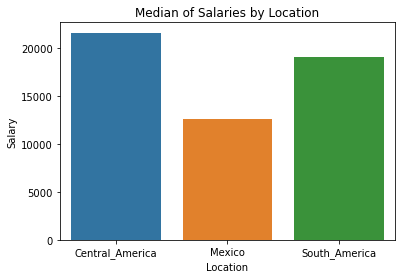

In [13]:
salary_plot = salary.groupby(['Location'])['Salary'].median().reset_index()

sns.barplot(x = 'Location', y = 'Salary', data = salary_plot)
plt.title('Median of Salaries by Location');

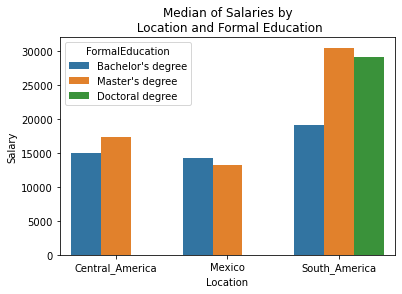

In [14]:
salary_academics = salary.copy()

salary_academics = salary_academics[salary_academics['FormalEducation'].isin(["Bachelor's degree", "Master's degree", "Doctoral degree"])]

salary_academics_plot = salary_academics.groupby(['Location', 'FormalEducation'])['Salary'].median().reset_index()

sns.barplot(x = 'Location', y = 'Salary', hue = 'FormalEducation', data = salary_academics_plot)
plt.title('Median of Salaries by\n Location and Formal Education');

> - **We can see that with a bachelor's, master's you will have a better salary in South America**
> - **Only in South America there people who have a PhD**
> - **South America has better salaries in general than Mexico and Central America** 

## Question 2: Which location has a the highest salary growth?

But that is not all that is important, since we are planning on living for a long time on our new home, so we need to have a clear idea if salaries experience growth as we have more and more experience at our jobs.

In [15]:
salary_years = salary.copy()

# Select our columns of interest
columns = ['YearsCodedJob','Salary', 'Location']
salary_years = salary_years[columns]

# We drop data that does not have a YearsCodedJob value, remember that -1 was a null value
salary_years = salary_years[salary_years['YearsCodedJob'] != -1]

In [16]:
# As before, to protect ourselfs from outliers, we will use median as our base of measure
salary_years = salary_years.groupby(['Location','YearsCodedJob'])['Salary'].median().reset_index()

# Since we want to calculate change, it would be easier if we separate the continents
sy_Mexico = salary_years[salary_years['Location'] == 'Mexico']
sy_Central = salary_years[salary_years['Location'] == 'Central_America']
sy_South = salary_years[salary_years['Location'] == 'South_America']

# We want the total change over time, si we calculate the cumulative change rate
sy_Mexico['change'] = sy_Mexico['Salary'].pct_change().cumsum()
sy_Central['change'] = sy_Central['Salary'].pct_change().cumsum()
sy_South['change'] = sy_South['Salary'].pct_change().cumsum() 

# We join both data frames 
salary_years = pd.concat([sy_Central,sy_Mexico,sy_South])

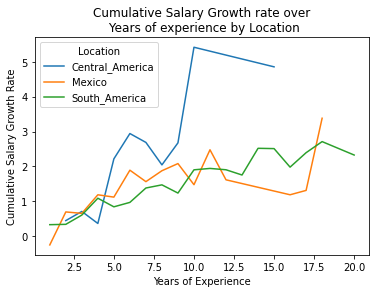

In [17]:
# We erase the starting points of each continent since the value is nan
salary_years = salary_years[salary_years['YearsCodedJob'] != 0] 

ax = sns.lineplot(x="YearsCodedJob", y="change", hue="Location", data=salary_years)
plt.title('Cumulative Salary Growth rate over\n Years of experience by Location')
plt.ylabel('Cumulative Salary Growth Rate')
plt.xlabel('Years of Experience');

> - **The cumulative growth of the salary rate is different in the three locations**
> - **We can see how in South America the data behaves in a more constant and uniform way**.

## Question 3: Which location has the highest career satisfaction?

In [18]:
columns = ['YearsCodedJob', 'CareerSatisfaction','Location']
CareerSatisfaction = CareerSatisfaction[columns]

CareerSatisfaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189 entries, 0 to 1196
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearsCodedJob       1189 non-null   int64  
 1   CareerSatisfaction  1189 non-null   float64
 2   Location            1189 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 37.2+ KB


In [19]:
# We group our data by years coded and obtain the mean of the satisfaction
CareerSatisfaction = CareerSatisfaction.groupby(['Location','YearsCodedJob'])['CareerSatisfaction'].mean().reset_index()

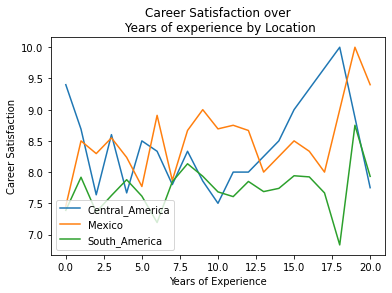

In [20]:
sns.lineplot(x="YearsCodedJob", y="CareerSatisfaction", hue="Location", data=CareerSatisfaction)
plt.ylabel('Career Satisfaction')
plt.xlabel('Years of Experience')
plt.title('Career Satisfaction over\n Years of experience by Location');
plt.legend(loc=3);

> **We can see that Mexico and South America start with a similiar career satisfaction but South America has a drop at the firts years while Mexico has a stable behavior also drop between year 10 and 17.5 after have an important increase. Central America starts with the highest career satisfaction but it decrease after a few years and shows a substancial increase until year 17.5 but then it drops abruptly**.